In [1]:
# Load pyspark, pandas
from pyspark import SparkConf, SparkContext
import pandas as pd

In [2]:
# Configure Spark
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
sc = SparkContext(conf=conf)

In [3]:
# Dataset sample
filename = "fhvhv_tripdata_2020-03_short.csv"

In [4]:
# Data parsing
lines = sc.textFile("./data/" + filename)
header = lines.first()
filtered_lines = lines.filter(lambda row: row != header) 

In [11]:
# New RDD and count values
company = filtered_lines.map(lambda x: x.split(",")[0].split(" ")[0])
result = company.countByValue()
result

defaultdict(int, {'HV0005': 260595, 'HV0003': 763962, 'HV0004': 24018})

In [12]:
# Save results as a csv file
pd.Series(result, name="trips").to_csv("./data/trips_company.csv")

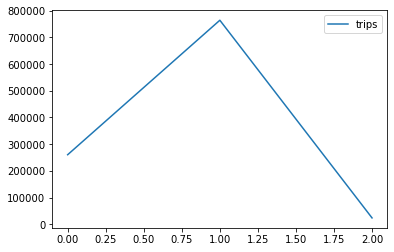

In [13]:
# Visualize the results
import matplotlib.pyplot as plt

trips = pd.read_csv("./data/trips_company.csv")
trips.plot()
plt.show()